<a href="https://colab.research.google.com/github/yoursmaddyy/Machine-Learning-Track/blob/main/LinearRegressionMultiVariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns



In [18]:
d = files.upload()

Saving hiring.csv to hiring.csv


In [19]:
df = pd.read_csv("hiring.csv")

In [21]:
df.experience.fillna("zero", inplace=True)

In [22]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [27]:
word_to_num = {
    'zero': 0,
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10,
    'eleven': 11
}
df["experience"] = df.experience.map(word_to_num)

In [28]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000


In [30]:
df.isnull().sum()

,0
experience,0
test_score(out of 10),1
interview_score(out of 10),0
salary($),0


In [54]:
medscore = df["test_score(out of 10)"].median()
medscore

8.0

In [50]:
df.columns

Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')

In [74]:
df["test_score(out of 10)"] = df['test_score(out of 10)'].fillna(medscore)

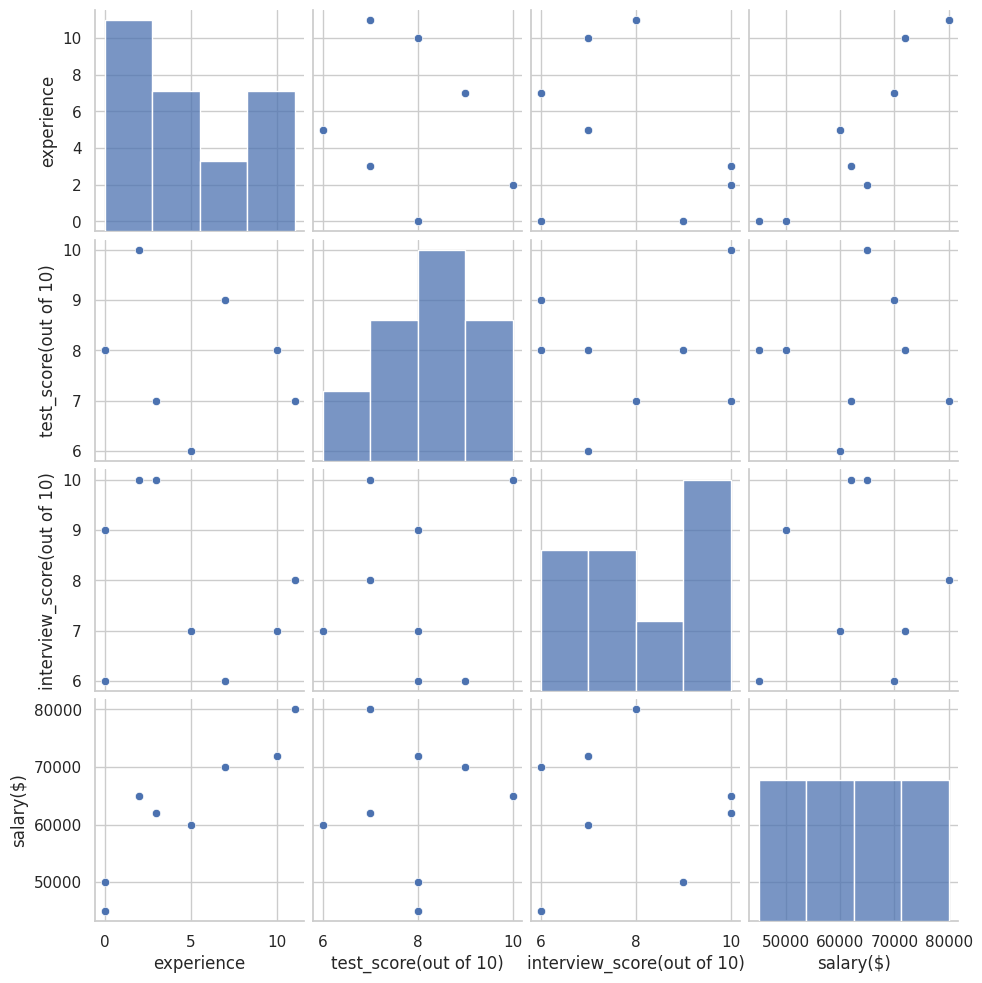

In [77]:
sns.pairplot(df)
plt.show()


In [90]:
model = linear_model.LinearRegression()

In [91]:
model.fit(df[["experience", "test_score(out of 10)", "interview_score(out of 10)"]], df["salary($)"])

LinearRegression()

In [92]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [2812.95487627 1845.70596798 2205.24017467]
Intercept: 17737.263464337688


In [108]:
prediction = model.predict(df[["experience", "test_score(out of 10)", "interview_score(out of 10)"]])

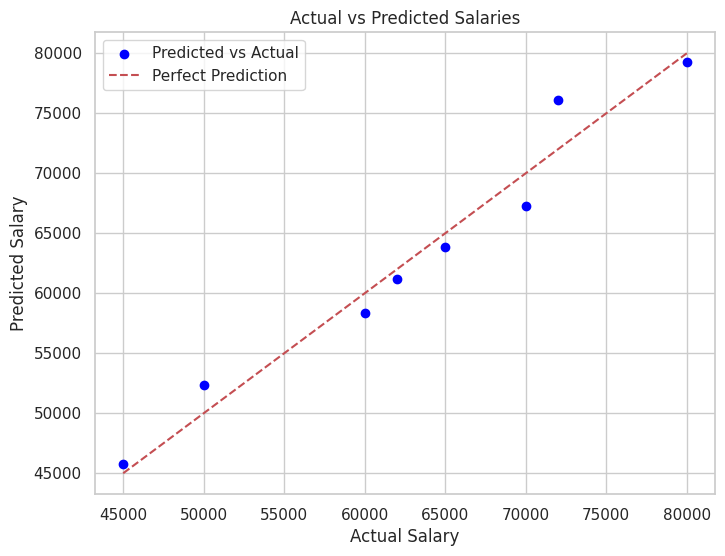

In [109]:
plt.figure(figsize=(8, 6))
plt.scatter(df['salary($)'], prediction, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salaries")
plt.legend()
plt.grid(True)
plt.show()

[50752.54730713 57097.52547307 57953.42066958]
